# Fuerzas de ligadura | Partícula deslizando sobre una semi-esfera

[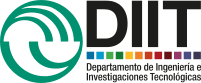](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/bettachini/UNLaM_MecanicaGeneral/blob/master/06FuerzasLigadura/ligaduraDeslizaSemiEsfera.ipynb)

## Enunciado
> Classical Dynamics of Particles and Systems  
Example 7.10  
Stephen T. Thornton y Jerry B. Marion  

Una partícula de masa $m$ está inicialmente en reposo en la cúspide de de una semi-esfera suave (sin fricción) fija de radio $R$.
Encuentre la fuerza de ligadura, y determine el ángulo en que la partícula abandona la semi-esfera.

![](https://github.com/realmariano/UNLaM_MecanicaGeneral/blob/master/07FuerzasLigadura/figuras/deslizaSemiEsfera.png?raw=1)

## Resolución simbólica en el formalismo Lagrangiano

In [1]:
# módulo de cálculo simbólico
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con puntos para derivadas temporales
import warnings
warnings.filterwarnings("ignore")

### Parámetros del sistema

In [2]:
# parámetros físicos del sistema
g, R, m = sym.symbols('g, R, m', positive=True)# Defino coordenadas generalizadas 

### Coordenadas generalizadas

In [3]:
# Defino coordenadas generalizadas
t = sym.symbols('t') # tiempo
theta = sym.Function('theta')(t)
rho = sym.Function('rho')(t)

In [4]:
# Sistema cartesiano
N = sym.physics.vector.ReferenceFrame('N') # marco referencial N en coordenadas cartesianas

# posiciones
m_r = rho* (sym.sin(theta)* N.x + sym.cos(theta)* N.y)

### Restricciones a causa de las ligaduras

In [5]:
# Funciones de restricción fruto de las Ligaduras
lambda1 = sym.symbols('lambda_1') # Tantos lambda como funciones de restricción a causa de la ligadura
f1 = sym.Eq(sym.Function('f_1')(rho), rho - R)
f1

### Energía cinética y potencial

In [6]:
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
m_v = m_r.diff(t,N) # derivada respecto a t en el marco referencial N
m_T = unMedio* m* m_v.dot(m_v)
T = sym.Eq(sym.Symbol('T'), m_T.simplify() ) # simplify: simplifica usando factor común y otras operaciones
T

In [7]:
# potencial gravitatoria
m_V = - (m* g* (- N.y)).dot(m_r)
V = sym.Eq(sym.Symbol('V'), m_V )
V

## Lagrangiano

In [8]:
L = sym.Eq(sym.Symbol('\mathcal{L}'), (T.rhs - V.rhs))
L

## Ecuaciones de Euler-Lagrange

$$
\boxed{
    \frac{\partial}{\partial q_i} \mathcal{L}
    - \frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q}_i} \mathcal{L}
    + \sum_j \lambda_j \frac{\partial}{\partial q_i}  f_j
    = 0
}.
$$

In [9]:
rho_dq = L.rhs.diff(rho)
rho_dtdqp = L.rhs.diff(rho.diff(t) ).diff(t)
rho_ligadura = lambda1* f1.rhs.diff(rho)
rho_EL_val = rho_dq - rho_dtdqp + rho_ligadura
rho_EL = sym.Eq(rho_EL_val.simplify(), 0)

theta_dq = L.rhs.diff(theta)
theta_dtdqp = L.rhs.diff(theta.diff(t) ).diff(t)
theta_ligadura = lambda1* f1.rhs.diff(theta)
theta_EL_val = theta_dq - theta_dtdqp + theta_ligadura
theta_EL = sym.Eq(theta_EL_val.simplify(), 0)

sistemaEcuacionesEL = [rho_EL, theta_EL]

In [10]:
sistemaEcuacionesEL[0]

In [11]:
sistemaEcuacionesEL[1]

## Fuerza de ligadura

Para despejar $\lambda_1$ se hace uso de la expresión de la restricción de la ligadura, que puede derivarse sucesivamete para disponer de relaciones de velocidad y aceleración.

In [12]:
# en un diccionario registramos restricciones sobre rho de la ligadura
rho_f1_despeje = list ( sym.solveset(f1.rhs, rho) )[0]
rho_f1_restricciones = {
    rho : rho_f1_despeje,
    rho.diff(t) : rho_f1_despeje.diff(t),
    rho.diff(t,2) : rho_f1_despeje.diff(t,2),
}
rho_f1_restricciones

Estos restricciones fruto de la ligadura pueden escribirse como ecuaciones

In [13]:
f1_condiciones = [ sym.Eq(f1.rhs, 0), sym.Eq(f1.rhs.diff(t), 0), sym.Eq(f1.rhs.diff(t,2), 0) ]
f1_condiciones

Para juntar en un único sistema de ecuaciones la que figuran en `sistemaEcuacionesEL` con aquellas en `f1_condiciones` se _concatenan_ ambas listas. 

In [14]:
sistemaEcuaciones = sistemaEcuacionesEL + f1_condiciones # el signo + concatena listas
sistemaEcuaciones

Con este conjunto es posible despejar las variables

In [15]:
variblesDespeje = [rho.diff(t,2,), theta.diff(t,2,), lambda1]
variblesDespeje

In [16]:
variblesDespeje_sol= sym.nonlinsolve(sistemaEcuaciones, variblesDespeje ).args[0]
variblesDespeje_sol= [variable.simplify() for variable in variblesDespeje_sol] # simplifica cada solución

Y en `variblesDespeje_sol` quedan expresiones simplificadas para cada una de las variables en `variablesDespeje` 

In [17]:
sym.Eq(variblesDespeje[0], variblesDespeje_sol[0] )

In [18]:
sym.Eq(variblesDespeje[1], variblesDespeje_sol[1] )

In [19]:
sym.Eq(variblesDespeje[2], variblesDespeje_sol[2] )

Como la fuerza de ligadura se presenta cuando está en contacto con la semi-esfera 

In [20]:
f1_despejeRho = list ( sym.solveset(f1.rhs, rho) )[0] 
sym.Eq( rho, f1_despejeRho )

Así la fuerza de ligadura es

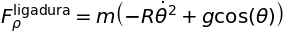

In [21]:
lambda1_subs = variblesDespeje_sol[2].subs(rho_f1_restricciones)
rho_ligadura_subs = lambda1_subs* f1.rhs.diff(rho)
rho_ligadura = sym.Eq( sym.Symbol('F^\mathrm{ligadura}_{\\rho}'), rho_ligadura_subs )
rho_ligadura

## Ángulo de despegue

Al anularse $F^\mathrm{ligadura}_{\rho}$, es decir, desaparezca la fuerza normal a la superficie, la partícula se despega de esta.
Para obtener $\theta^\mathrm{despegue}$ primero debe hallarse$\dot{\theta} = \dot{\theta}(\theta)$.

En la expresión para $\ddot{\theta}$

In [22]:
sym.Eq(variblesDespeje[1], variblesDespeje_sol[1] )

se substituyen las restricciones que impone la ligadura.  

In [23]:
theta_pp_subs = variblesDespeje_sol[1].subs(rho_f1_restricciones)
sym.Eq(variblesDespeje[1], theta_pp_subs )

Esta expresión es integrable para el recorrido que hace la partícula.
Previo a integrar se aprovecha que
$$
\ddot{\theta} 
= \frac{d}{d t} \frac{d \theta}{d t} 
= \frac{d}{d t} \frac{d \dot{\theta}}{d t} 
= \frac{d \dot{\theta}}{d \theta} \frac{d \theta}{d t}
= \dot{\theta} \frac{d \dot{\theta}}{d \theta}
$$

Como la partícula parte de $\theta(t=0) = 0$ con $\dot{\theta}(t=0) = 0$.
$$
\begin{aligned}
\int_0^{\dot{\theta}_\mathrm{despegue}} \dot{\theta} d \dot{\theta}
&= \int_0^{\theta_\mathrm{despegue}} \frac{g}{R} \sin{\theta} d \theta\\
\frac{\dot{\theta}^2}{2} \bigg|_0^{\dot{\theta}_\mathrm{despegue}}
&= \frac{g}{R} (-\cos{\theta}) \bigg|_0^{\theta_\mathrm{despegue}}\\
\frac{\dot{\theta}_\mathrm{despegue}^2}{2}
&= \frac{g}{R} (-\cos{\theta_\mathrm{despegue}} + 1)\\
\end{aligned}
$$

Se substituye el $\dot{\theta}^2$ en la expresión de \\(F^\mathrm{ligadura}_{\rho}\\).
En el momento de _despegue_ esta fuerza debe sere igual a cero.

In [24]:
rho_ligadura_despegue = rho_ligadura_subs.subs(theta.diff(t)**2, (2*g/R)* (-sym.cos(theta)+1 ) ).simplify()
sym.Eq(rho_ligadura_despegue, 0)

In [25]:
theta_despegue = sym.solve(sym.Eq(rho_ligadura_despegue, 0), theta)
theta_despegue

Tomando la 2.a solución (la otra es que caiga del otro lado de la semi-esfera) y expresandola en grados resulta

In [26]:
theta_despegue[1].n(), (theta_despegue[1]* 180/ sym.pi ).n()

## Graficando la fuerza de ligadura

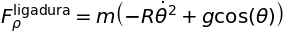

In [27]:
rho_ligadura

Obtendremos soluciones numéricas para las variables $\theta(t)$ y $\dot{\theta}(t)$.
Por tanto el vector de estado que nos interesa actualizar es

In [28]:
y= [theta, theta.diff(t)]
y

Ya se resolvió el sistema para $\ddot{\theta}$ en el que substituimos las condiciones de ligadura

In [29]:
theta_pp = sym.Eq(variblesDespeje[1], variblesDespeje_sol[1].subs(rho_f1_restricciones) )
theta_pp

Resto dar establecer las magnitudes de los parámetros físicos del problema y convertir la expresión en una que procese `numpy`

In [30]:
import numpy as np  # biblioteca de cálculo numérico general

In [31]:
magnitudes = {
    g : 9.81 , # [m s-2]
    R : 1 , # [m] radio de la semi-esfera
    m : 1 , # [kg] no es necesaria para la dinámica pero si para la fuerza de ligadura
}
theta_pp_numpy = sym.lambdify(y, theta_pp.subs(magnitudes).rhs )

Las condiciones iniciales son las del enunciado: la partícula parte del reposo en al cúspide de la semi-esfera.

Pero si efectivamente está ahí en reposo no hay razón para que salga de tal estado.
Así que cambio ligeramente la condición inicial poniendola en un $\theta(0) = 0.1^{\circ}$

In [32]:
y_inicial = [0, 0.1* np.pi/180]

Se simularán los primeros 2,6 segundos.
Poco antes de ese tiempo se despega de la semi-esfera.

In [33]:
t_rango = np.linspace(0, 2.6, 100) # tiempos inicial,final y cuantos tiempos intermedios equiespaciados

Integramos en los pasos de tiempo de `t_rango`.

In [34]:
# biblioteca de cálculo científico: eficientes herramientas de cálculo numérico
# Importo la función solve_ivp: resolver un sistema de ODEs con condiciones iniciales
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp
from scipy.integrate import solve_ivp

In [35]:
# defino una función con el sistema de derivadas
# t : no se usa en este sistema pero lo dejamos para uso posterior
# y : lista de estado con [y[0], y[1]]
# y[0]: theta
# y[1]: theta punto
# dydt : lista de derivadas
def y_punto(t, y):
    dydt = [y[1],
            theta_pp_numpy(y[0], y[1] )
           ]
    return dydt

In [36]:
# Integración de a pasos en el tiempo
y_ode2 = solve_ivp(y_punto, 
                   (t_rango[0], t_rango[-1] ), 
                   y_inicial, t_eval = t_rango,
                  )

En `y_ode2` se almacenan los resultados:
- `y_ode2.y[0]` está $\theta(t)$ en radianes
- `y_ode2.y[1]` $\dot{\theta}$ en radianes por segundo
- `y_ode2.t` los tiempos que corresponden a los elementos anteriores

In [37]:
# biblioteca de graficación
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[Text(0, 0.5, '$\\dot{\\theta}$ [$^\\circ$/s]'),
 Text(0.5, 0, 't [s]'),
 Text(0.5, 1.0, 'Velocidad')]

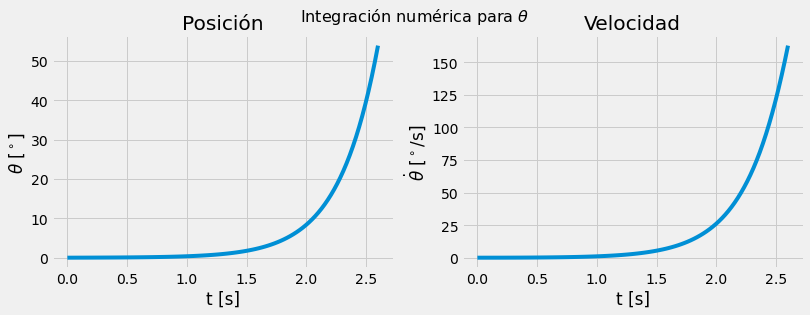

In [42]:
solucion = y_ode2
nombreCoordenada = '\\theta'

fig, ax = plt.subplots(nrows= 1, ncols= 2, squeeze=False, figsize=(12, 4)) # dos figuras en la misma fila
fig.suptitle('Integración numérica para $'+ nombreCoordenada + '$', fontsize=16)
ax[0,0].plot(solucion.t, solucion.y[0]* 180/np.pi) # posición phi
ax[0,0].set(xlabel='t [s]', ylabel= '$' + nombreCoordenada+ '$ [$^\circ$]', title='Posición')
ax[0,1].plot(solucion.t, solucion.y[1]* 180/np.pi) # velocidad phi
ax[0,1].set(xlabel='t [s]', ylabel='$\dot{' + nombreCoordenada+ '}$ [$^\circ$/s]', title='Velocidad')

Hay que obtener \\(F^\mathrm{ligadura}_{\rho}\\) en esos tiempos primero la convertimos en una expresión para `numpy` contemplando los parámetros físicos.
Luego se usan los $\theta(t)$ y $\dot{\theta}(t)$ en esos tiempos para calcular un vector que graficaremos contra el vector de tiempos. 

In [39]:
rho_ligadura_numpy = sym.lambdify(y, rho_ligadura.rhs.subs(magnitudes) )
rho_ligadura_t = rho_ligadura_numpy(y_ode2.y[0], y_ode2.y[1])

[Text(0, 0.5, '$F^\\mathrm{ligadura}_{\\rho}$ [N]'), Text(0.5, 0, 't [s]')]

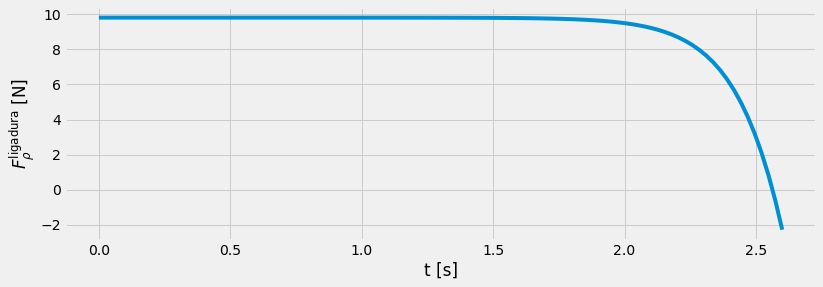

In [40]:
fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize=(12, 4)) # dos figuras en la misma fila
ax.plot(y_ode2.t, rho_ligadura_t)
ax.set(xlabel = 't [s]', ylabel= '$F^\mathrm{ligadura}_{\\rho}$ [N]')

Aquí se ve como \\(F^\mathrm{ligadura}_{\rho}\\) fue casi todo el tiempo la contrapartida del peso hasta llegar a despegarse \\(F^\mathrm{ligadura}_{\rho}(\theta^\mathrm{despegue}) = 0\\).

De hecho es mucho más interesante graficar esto mismo  en función de $\theta$.

[Text(0, 0.5, '$F^\\mathrm{ligadura}_{\\rho}$ [N]'),
 Text(0.5, 0, '$\\theta$ [$^\\circ$]')]

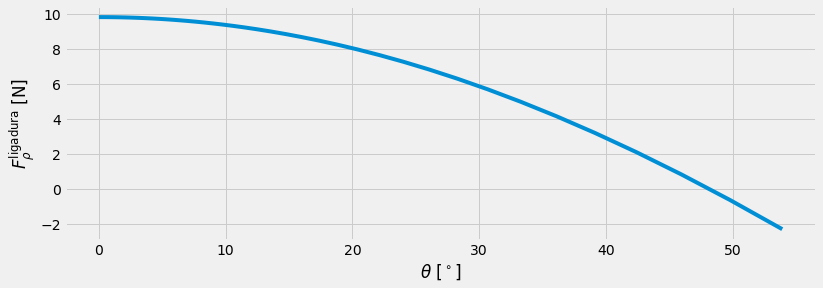

In [41]:
fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize=(12, 4)) # dos figuras en la misma fila
ax.plot(y_ode2.y[0]* 180/np.pi, rho_ligadura_t)
ax.set(xlabel = '$\\theta$ [$^\circ$]', ylabel= '$F^\mathrm{ligadura}_{\\rho}$ [N]')

Donde se evidencia que la fuerza se hace nula para los $\sim 48^\circ$ anteriormente calculados.